# Recommender system
I define two recommender functions in this notebook. One is based on item similarity (between movies) and the other one based on user similarity (personality!)
I should mention that most of the times, I did not like what Netflix recommended me! Meaning that recommendation systems are very challengi

In [73]:
import numpy as np
import pandas as pd

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
with open('u.data', mode='rt') as file: # mode='rt' is the default parameter for open()
    for i in range(5):
        print(repr(file.readline())) # everytime you readline cursor moves to the next line

'0\t50\t5\t881250949\n'
'0\t172\t5\t881250949\n'
'0\t133\t1\t881250949\n'
'196\t242\t3\t881250949\n'
'186\t302\t3\t891717742\n'


Using repr() we can see that columns are tab-delimited and there are four columns and no header

In [88]:
df = pd.read_csv('u.data', sep='\t', names = 'user_id item_id rating timestamp'.split())

In [89]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [90]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [91]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [92]:
df = df.merge(movie_titles, on='item_id') # merging two data frames on item_id

In [122]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [93]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10) #average rating of a movie

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [94]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10) #Number of ratings for a movie 
                                                                            #this is a pandas series

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [171]:
ratings =pd.DataFrame(df.groupby('title')['rating'].mean()) #creating a ratings data frame with two columns
ratings['n_ratings'] = df.groupby('title')['rating'].count() 

In [172]:
ratings.sort_values('n_ratings', ascending=False).head()

,rating,n_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


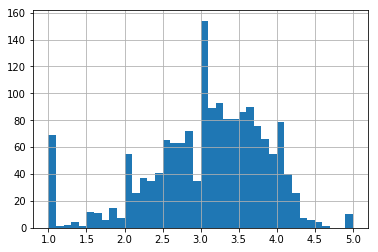

In [100]:
ratings['rating'].hist(bins=40)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


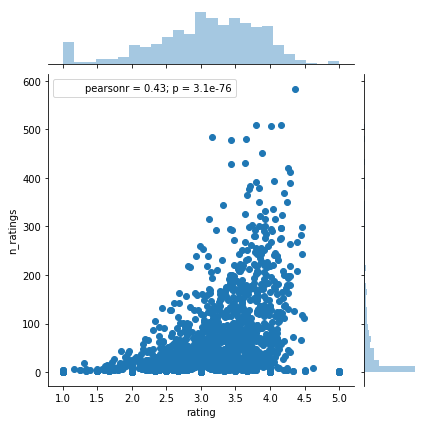

In [106]:
sns.jointplot('rating', 'n_ratings', data=ratings)

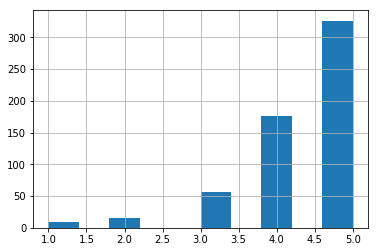

In [108]:
# If we want to see the ratings distribution of a movie (e.g. star wars (1977))we can:
df[df['title']=="Star Wars (1977)"]['rating'].hist()

The basic idea of recommending an item is based on the similarity between the items. if somebody likes star war then he/she would probably enjoy watching sci-fi movies. how can we measure similarity among movies in this dataset? if people rate movies the same, those movies are probably similar

In [109]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [112]:
movie_ratings = df.pivot_table(values='rating', index='user_id', columns='title')

In [113]:
movie_ratings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Provided we have enough data points:
 * If two rows are similar ---> two persons have similar characters. "user-item memory based collaborative filtering"
 * If two columns are similar ---> those two movies are kind of the same "item-item memory based CF"
2. Two important factors:
 * It is very important to have enough number of ratings for movies:
 * how are we going to calculate similarity? correlation coefficient?

In [120]:
movie_ratings.corrwith(movie_ratings['Star Wars (1977)']).sort_values(ascending=False).head(5)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


title
Hollow Reed (1996)                                                                   1.0
Stripes (1981)                                                                       1.0
Full Speed (1996)                                                                    1.0
Golden Earrings (1947)                                                               1.0
Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)    1.0
dtype: float64

lets check the number of ratings for Hollow Reed (1996)

In [121]:
ratings.loc['Hollow Reed (1996)'] #only six people have rated the movie

rating       2.333333
n_ratings    6.000000
Name: Hollow Reed (1996), dtype: float64

In [124]:
hollow_reed_reviewers = df[df['title']=='Hollow Reed (1996)']
hollow_reed_reviewers

,user_id,item_id,rating,timestamp,title
99805,460,1380,3,882912469,Hollow Reed (1996)
99806,181,1380,1,878962086,Hollow Reed (1996)
99807,662,1380,2,880570952,Hollow Reed (1996)
99808,782,1380,2,891500150,Hollow Reed (1996)
99809,655,1380,4,887425625,Hollow Reed (1996)
99810,733,1380,2,879536567,Hollow Reed (1996)


how did these people rate starwars?

In [140]:
movie_ratings[['Hollow Reed (1996)', 'Star Wars (1977)']].dropna()

title,Hollow Reed (1996),Star Wars (1977)
user_id,,
655,4.0,4.0
662,2.0,3.0
782,2.0,3.0


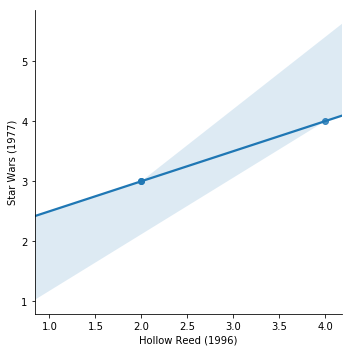

In [141]:
sns.lmplot('Hollow Reed (1996)', 'Star Wars (1977)', data=movie_ratings )

   Because those two series can sit on a linear ascending line the correlation coefficient is one. However, it does not really      show that these two movies are similar unless we have enough number of ratings and good variance
   So, lets filter the data to get a more meaningful results

In [142]:
starwars_corr = movie_ratings.corrwith(movie_ratings['Star Wars (1977)'])
ratings['starwars_corr'] = starwars_corr

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [146]:
ratings[ratings['n_ratings'] > 100]['starwars_corr'].sort_values(ascending=False).head(5)

title
Star Wars (1977)                                      1.000000
Empire Strikes Back, The (1980)                       0.748353
Return of the Jedi (1983)                             0.672556
Raiders of the Lost Ark (1981)                        0.536117
Austin Powers: International Man of Mystery (1997)    0.377433
Name: starwars_corr, dtype: float64

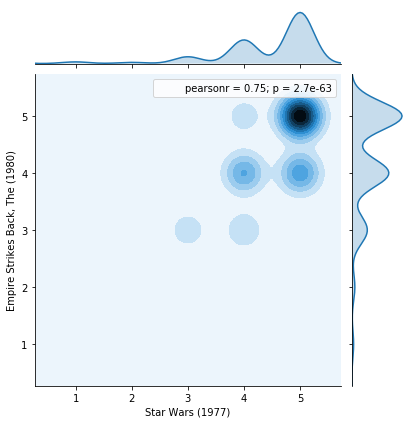

In [154]:
sns.jointplot('Star Wars (1977)', 'Empire Strikes Back, The (1980)', data=movie_ratings, kind='kde' )

In [157]:
contact_corr = movie_ratings.corrwith(movie_ratings['Contact (1997)'])
ratings['contact_corr'] = contact_corr
ratings[ratings['n_ratings'] > 100]['contact_corr'].sort_values(ascending=False).head(5)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


title
Contact (1997)         1.000000
Philadelphia (1993)    0.446509
Mask, The (1994)       0.418328
Young Guns (1988)      0.388839
Sling Blade (1996)     0.384840
Name: contact_corr, dtype: float64

CR coefficients are very small and probably not reliable when less than 0.5

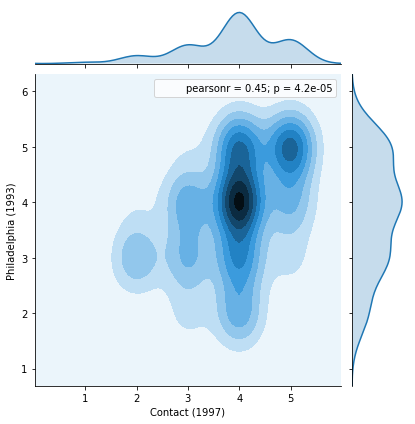

In [153]:
sns.jointplot('Contact (1997)', 'Philadelphia (1993)', data=movie_ratings, kind='kde' )

In [173]:
#We can calculate the corr column for each movie
for movie in movie_ratings.columns:
    col_name = str(movie)+'_corr' 
    col_values = movie_ratings.corrwith(movie_ratings[movie])
    ratings[col_name] = col_values

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [174]:
ratings.head()

,rating,n_ratings,'Til There Was You (1997)_corr,1-900 (1994)_corr,101 Dalmatians (1996)_corr,12 Angry Men (1957)_corr,187 (1997)_corr,2 Days in the Valley (1996)_corr,"20,000 Leagues Under the Sea (1954)_corr",2001: A Space Odyssey (1968)_corr,...,Yankee Zulu (1994)_corr,Year of the Horse (1997)_corr,You So Crazy (1994)_corr,Young Frankenstein (1974)_corr,Young Guns (1988)_corr,Young Guns II (1990)_corr,"Young Poisoner's Handbook, The (1995)_corr",Zeus and Roxanne (1997)_corr,unknown_corr,Á köldum klaka (Cold Fever) (1994)_corr
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),2.333333,9,1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),2.600000,5,NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),2.908257,109,-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,0.000000,0.707107,NaN,NaN
12 Angry Men (1957),4.344000,125,-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,0.144338,1.000000,1.0,NaN
187 (1997),3.024390,41,-0.5,NaN,0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,0.475327,NaN,NaN,NaN


In [189]:
ratings_filt = ratings[ratings['n_ratings'] > 80]

In [190]:
col_list = [col+'_corr' for col in ratings_filt.index]

In [194]:
recom_matrix = pd.DataFrame(data=ratings_filt, index=ratings_filt.index, columns=col_list)

In [ ]:
recom_matrix[recom_matrix > 0.5]

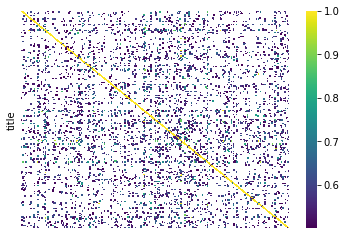

In [199]:
sns.heatmap(recom_matrix[recom_matrix > 0.5], xticklabels=False, yticklabels=False, cmap='viridis')
    

In [279]:

def recommender(movie_name):
    movies_found = []
    for movie in recom_matrix.columns:
        if movie_name.lower() in movie.lower():
            movies_found.append(movie)
    total = len(movies_found)
    message = '{} movies with similar name found'.format(total)
    if total > 1:
        for x in movies_found:
            print(x.strip('_corr'))
        print('Please select one of the above movies!')
    elif total == 1:
        return recom_matrix[movies_found[0]].sort_values(ascending=False).head(5)
    else:
        print('no movies containing the word: "{}"'.format(movie_name))


In [284]:
recommender('good')

As Good As It Gets (1997)
Good Will Hunting (1997)
Good, The Bad and The Ugly, The (1966)
GoodFellas (1990)
Long Kiss Goodnight, The (1996)
Please select one of the above movies!


In [285]:
recommender('Long Kiss Goodnight, The (1996)')

title
Long Kiss Goodnight, The (1996)                1.000000
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)    0.794634
Jackal, The (1997)                             0.684477
Some Like It Hot (1959)                        0.614658
Deer Hunter, The (1978)                        0.575996
Name: Long Kiss Goodnight, The (1996)_corr, dtype: float64

now lets look at the cosine similarity measure instead of correlation

In [394]:
from sklearn.metrics import pairwise

In [334]:
movie_ratings_matrix = df.pivot_table(values='rating', index='user_id', columns='item_id')

In [356]:
col_list = list(df['item_id'].unique())

In [358]:
col_list.sort()

In [360]:
movie_ratings_matrix = movie_ratings_matrix[col_list] # this is how to rearrange the columns in a dataframe

In [362]:
movie_ratings_matrix.head(0)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,


In [364]:
print(pd.__version__) # there is a pd.to_numpy() method which is available in > 0.24.0

0.23.0


In [369]:
movie_ratings_matrix = movie_ratings_matrix.fillna(value=0)

In [370]:
movie_mat = movie_ratings_matrix.values

In [390]:
user_similarity = pairwise.cosine_similarity(movie_mat)

In [556]:
df_user = pd.DataFrame(df.groupby('user_id')['title'].count())
df_user['n_movies_rated'] = df_user['title']
df_user.drop('title', axis=1, inplace=True)

In [559]:
df_user.sort_values('n_movies_rated', ascending=False).head(10)

,n_movies_rated
user_id,
405,737
655,685
13,636
450,540
276,518
416,493
537,490
303,484
234,480


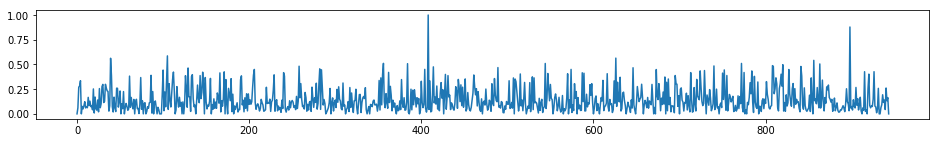

In [493]:
plt.figure(figsize=(16,2))
plt.plot(user_similarity[408,:]) # lets consider user_id = 408, off course it shows perfect match with itself.

In [495]:
similar_users_408 = np.argsort(user_similarity[408,:])[-6:] # top 5 most similar users to user_id = 408 are:
similar_users_408

array([856,  39, 626, 105, 898, 408], dtype=int64)

In [496]:
np.sort(user_similarity[408,:])[-6:] # and their similarity measurements are:

array([0.5414015 , 0.56259348, 0.56404165, 0.58653066, 0.87878018,
       1.        ])

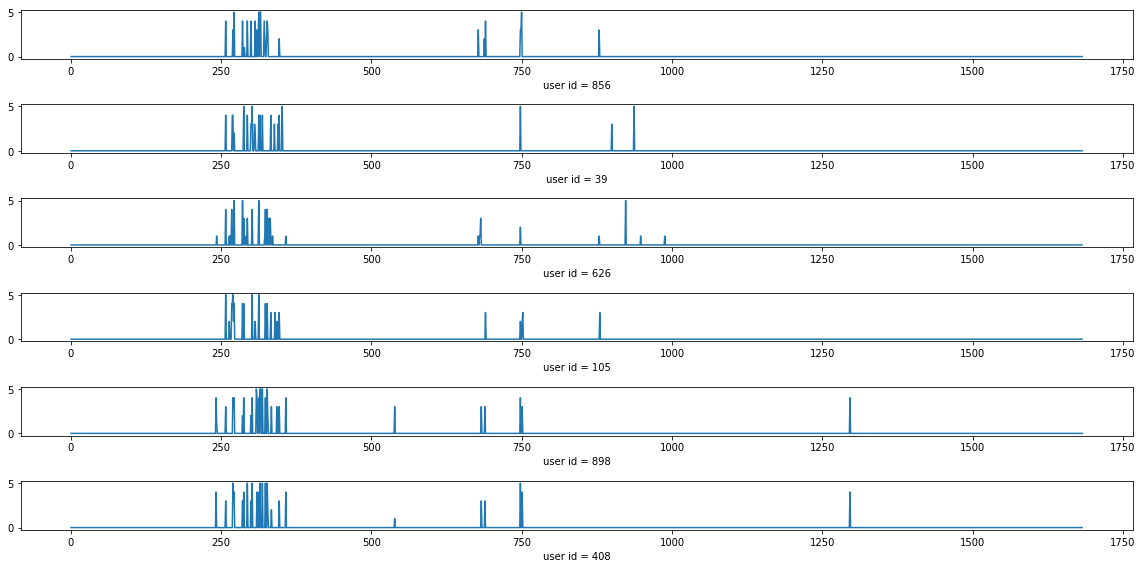

In [497]:
#we can compare their ratings sequence for different movies ()
fig, axes = plt.subplots(6, 1, figsize=(16, 8))
for ind, user_id in enumerate(similar_users_408):
    axes[ind].plot(movie_ratings_matrix.loc[user_id, :])
    axes[ind].set_xlabel('user id = {}'.format(user_id))
plt.tight_layout()    

In [502]:
user_similarity_id = np.argsort(user_similarity, axis=1)[:,-6:]
user_similarity_id[:10, :]

array([[563, 182, 723, 369,  51,   0],
       [435,  92, 268, 864, 916,   1],
       [104, 131, 460, 931, 701,   2],
       [784, 587, 616, 489, 863,   3],
       [173, 509, 570, 451, 750,   4],
       [660, 497, 407, 648, 307,   5],
       [194, 271, 537,  18, 474,   6],
       [308, 234, 406, 313, 650,   7],
       [466, 619, 826, 197, 600,   8],
       [740, 680, 433, 797, 735,   9]], dtype=int64)

In [499]:
np.sort(user_similarity, axis=1)[:10,-6:]

array([[0.32679739, 0.33377867, 0.35144555, 0.3620338 , 0.38896669,
        1.        ],
       [0.53866453, 0.54053356, 0.54207705, 0.54754826, 0.56906573,
        1.        ],
       [0.46712018, 0.47688   , 0.5044178 , 0.51247291, 0.58063572,
        1.        ],
       [0.46744239, 0.46883419, 0.48292093, 0.48592453, 0.48903179,
        1.        ],
       [0.35425548, 0.35985857, 0.37518966, 0.37532983, 0.39449094,
        1.        ],
       [0.4574951 , 0.46444728, 0.46913063, 0.47591722, 0.47888537,
        1.        ],
       [0.56078721, 0.5642768 , 0.57563549, 0.585087  , 0.59648041,
        1.        ],
       [0.62559167, 0.62572285, 0.62763322, 0.63360238, 0.65336389,
        1.        ],
       [0.49718483, 0.50840217, 0.57499602, 0.59615112, 0.61862685,
        1.        ],
       [0.22528289, 0.22745262, 0.22771002, 0.2297615 , 0.23642345,
        1.        ]])

in this data set, users 408 and 898 are the most similar pair. However, is this really meaningful? Infact, it is totally depedant on the number of ratings again. if person A and B see only 2 movies and rate them the same, does it mean they have similar movie appetite? NO! therefore, we need to filter the results

In [505]:
user_similarity_df = pd.DataFrame(user_similarity_id, columns= 'A B C D E'.split()+['user_id'])

In [561]:
df_user_similarity_rated = pd.merge(user_similarity_df, df_user, on='user_id')

In [589]:
df_user_similarity_rated.head()

,A,B,C,D,E,user_id,n_movies_rated
0,563,182,723,369,51,0,3
1,435,92,268,864,916,1,272
2,104,131,460,931,701,2,62
3,784,587,616,489,863,3,54
4,173,509,570,451,750,4,24


In [590]:
df_user_similarity_rated[df_user_similarity_rated['n_movies_rated'] > 50].head()

,A,B,C,D,E,user_id,n_movies_rated
1,435,92,268,864,916,1,272
2,104,131,460,931,701,2,62
3,784,587,616,489,863,3,54
5,660,497,407,648,307,5,175
6,194,271,537,18,474,6,211


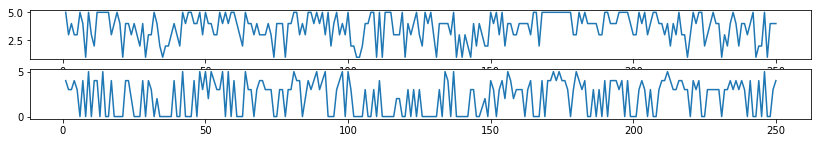

In [574]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,2))
ax1.plot(movie_ratings_matrix.loc[1, :250])
ax2.plot(movie_ratings_matrix.loc[916, :250])     

In [592]:
user_similarity_df_values = pd.DataFrame(np.sort(user_similarity, axis=1)[:,-6:], columns= 'A_value B_value C_value D_value E_value'.split()+['user_id'])
user_similarity_df_values['user_id'] = user_similarity_df_values.index
user_similarity_df_values.head()


,A_value,B_value,C_value,D_value,E_value,user_id
0,0.326797,0.333779,0.351446,0.362034,0.388967,0
1,0.538665,0.540534,0.542077,0.547548,0.569066,1
2,0.467120,0.476880,0.504418,0.512473,0.580636,2
3,0.467442,0.468834,0.482921,0.485925,0.489032,3
4,0.354255,0.359859,0.375190,0.375330,0.394491,4


In [594]:
df_user_similarity_rated_values = pd.merge(df_user_similarity_rated, user_similarity_df_values, on='user_id')

In [595]:
cols = sorted(df_user_similarity_rated_values.columns)

In [596]:
df_user_similarity_rated_values = df_user_similarity_rated_values[cols]

In [597]:
df_user_similarity_rated_values.head()

,A,A_value,B,B_value,C,C_value,D,D_value,E,E_value,n_movies_rated,user_id
0,563,0.326797,182,0.333779,723,0.351446,369,0.362034,51,0.388967,3,0
1,435,0.538665,92,0.540534,268,0.542077,864,0.547548,916,0.569066,272,1
2,104,0.467120,131,0.476880,460,0.504418,931,0.512473,701,0.580636,62,2
3,784,0.467442,587,0.468834,616,0.482921,489,0.485925,863,0.489032,54,3
4,173,0.354255,509,0.359859,570,0.375190,451,0.375330,750,0.394491,24,4


In [617]:
light_ratings = ratings[['rating', 'n_ratings']]

In [618]:
light_ratings.reset_index(inplace=True)

In [626]:
df_movies_rating = df.merge(light_ratings, on='title', suffixes=('', '_avg'))

In [641]:
df_movies_rating[(df_movies_rating['user_id'] == 916) & (df_movies_rating['rating'] > 3)].sort_values(['rating', 'rating_avg'], ascending=False).head(5)

,user_id,item_id,rating,timestamp,title,rating_avg,n_ratings
28338,916,483,5,880844419,Casablanca (1942),4.456790,243
37004,916,64,5,880843996,"Shawshank Redemption, The (1994)",4.445230,283
433,916,50,5,880843436,Star Wars (1977),4.359589,584
40031,916,134,5,880844123,Citizen Kane (1941),4.292929,198
6603,916,98,5,880844038,"Silence of the Lambs, The (1991)",4.289744,390


In [638]:
def recommender2(user_id):
    print('You have watched {} movies'.format(df_user_similarity_rated_values.loc[user_id, 'n_movies_rated']))
    similar_user = df_user_similarity_rated_values.loc[user_id, 'E']
    print(similar_user)
    movies = df_movies_rating[(df_movies_rating['user_id'] == similar_user) &
                     (df_movies_rating['rating'] > 3)].sort_values(['rating', 'rating_avg'], ascending=False)['title']
    already_watched = df_movies_rating[(df_movies_rating['user_id'] == user_id)]['title']
    to_watch_list = []
    for movie in movies:
        if movie not in already_watched:
            to_watch_list.append(movie)
    print('We recommend following movies: "total of "{}'.format(len(to_watch_list)))
    print(to_watch_list)
            

In [642]:
recommender2(408)

You have watched 27 movies
898
We recommend following movies: "total of "16
['As Good As It Gets (1997)', 'Apt Pupil (1998)', 'Cop Land (1997)', 'Everyone Says I Love You (1996)', 'Deceiver (1997)', 'Good Will Hunting (1997)', 'Titanic (1997)', 'L.A. Confidential (1997)', 'Kolya (1996)', 'Rainmaker, The (1997)', 'Gattaca (1997)', 'Scream (1996)', 'Indian Summer (1996)', 'Lost Highway (1997)', 'Saint, The (1997)', 'Spawn (1997)']
